In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import seaborn as sns 
import missingno as msgn 

In [2]:
data = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.shape

(110527, 14)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
def visualise_features(data):
    cols = list(data.columns)
    for col in cols:
        print(f"col name: {col}\nuniques: {data[col].loc[-100:].unique()}\nnumber  of uniques{data[col].loc[-100:].nunique()}\ntype: {type(data[col][0])}")
        print(150 * '-')

In [8]:
visualise_features(data)

col name: PatientId
uniques: [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
number  of uniques62299
type: <class 'numpy.float64'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: AppointmentID
uniques: [5642903 5642503 5642549 ... 5630692 5630323 5629448]
number  of uniques110527
type: <class 'numpy.int64'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: Gender
uniques: ['F' 'M']
number  of uniques2
type: <class 'str'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: ScheduledDay
uniques: ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z

# Data distribution

array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMS_received'}>]], dtype=object)

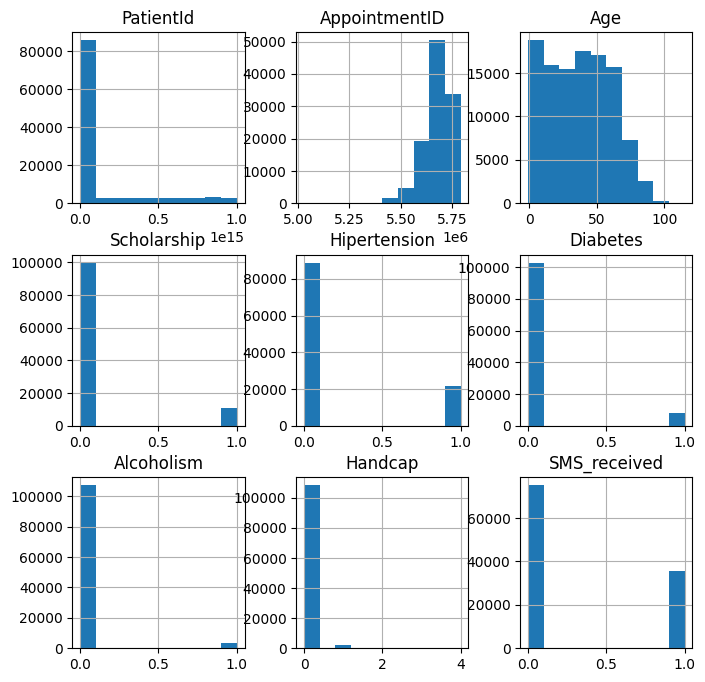

In [9]:
data.hist(figsize=(8, 8))

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['No-show'] = encoder.fit_transform(data['No-show'])

<Axes: ylabel='No-show'>

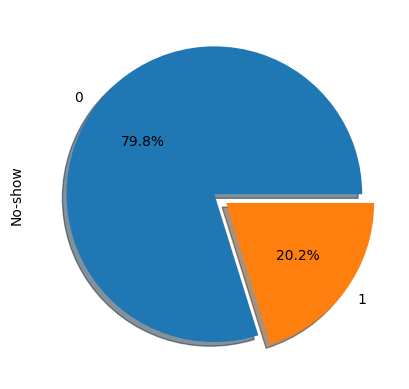

In [11]:
data['No-show'].value_counts().plot.pie(shadow=True,label='No-show',explode=[0,0.1], autopct='%1.1f%%')

it seems only 20% percent of patients visit the doctor on the appoitment time.

In [14]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0


<Axes: ylabel='diabetes'>

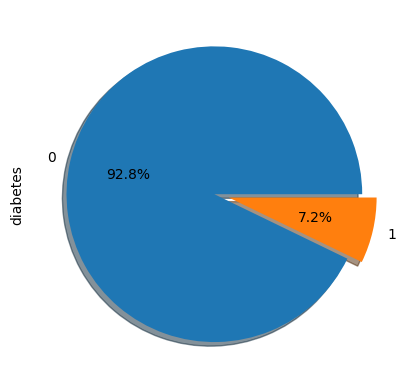

In [13]:
data['Diabetes'].value_counts().plot.pie(shadow=True,label='diabetes',explode=[0,0.1], autopct='%1.1f%%')

<Axes: ylabel='Gender'>

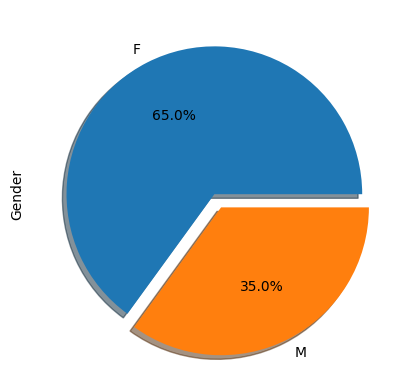

In [15]:
data['Gender'].value_counts().plot.pie(shadow=True,label='Gender',explode=[0,0.1], autopct='%1.1f%%')

<Axes: ylabel='SMS-recived'>

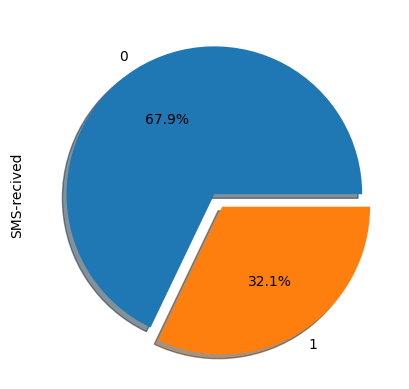

In [16]:
data['SMS_received'].value_counts().plot.pie(shadow=True,label='SMS-recived',explode=[0,0.1], autopct='%1.1f%%')

In [25]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [35]:
# visualise class No-show distributions 
show, noshow = data[data['No-show'] == 1], data[data['No-show'] == 0]

array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMS_received'}>],
       [<Axes: title={'center': 'No-show'}>, <Axes: >, <Axes: >]],
      dtype=object)

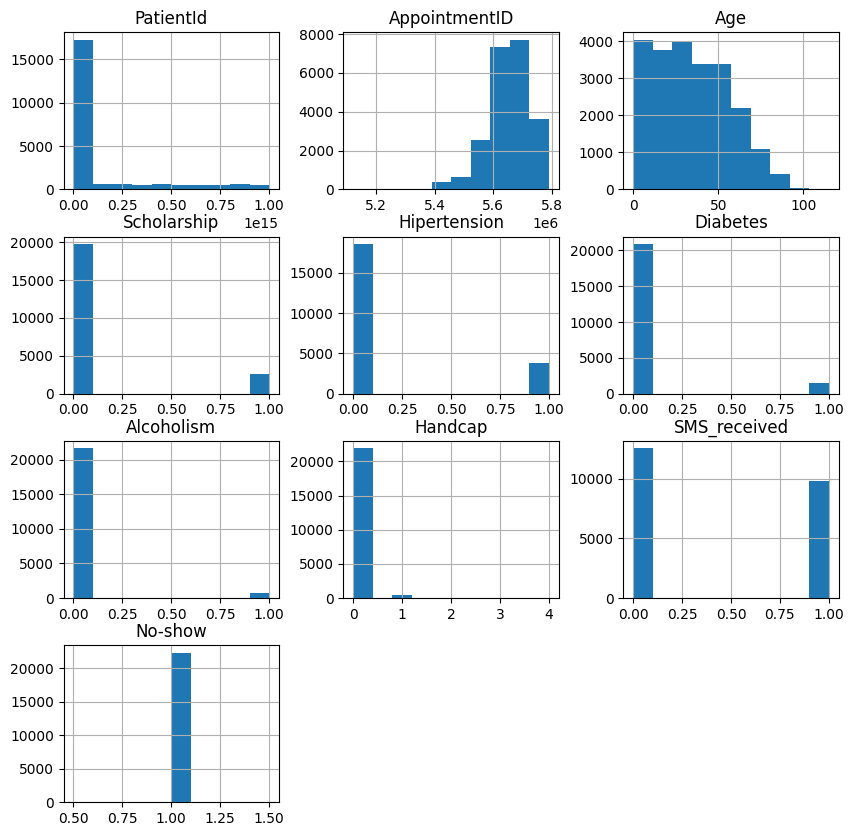

In [39]:
show.hist(figsize=(10, 10))

array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMS_received'}>],
       [<Axes: title={'center': 'No-show'}>, <Axes: >, <Axes: >]],
      dtype=object)

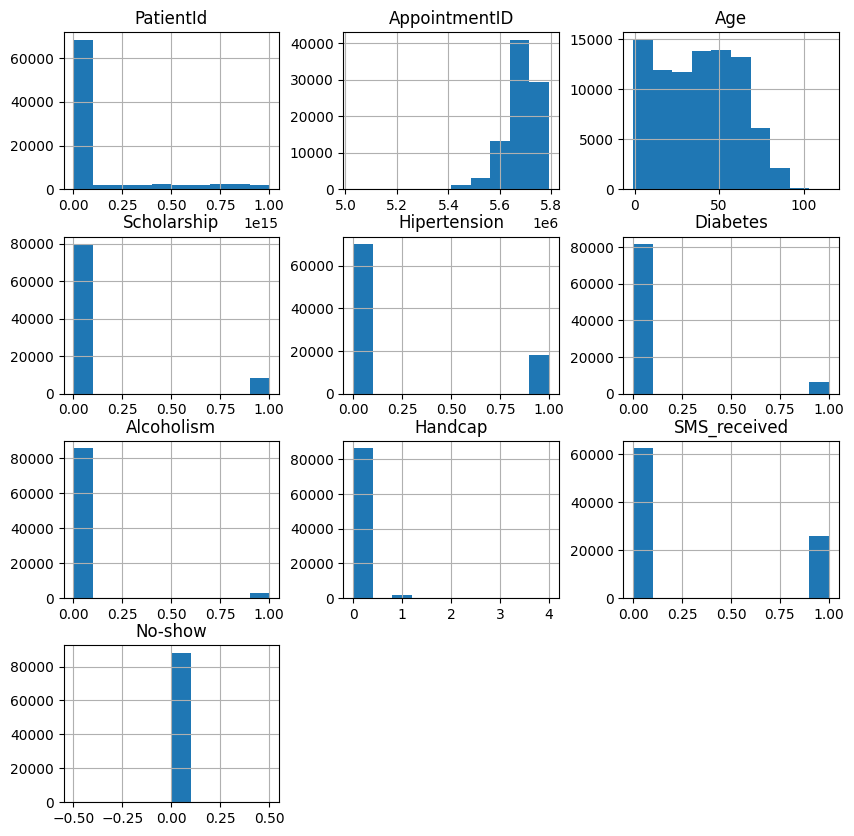

In [41]:
noshow.hist(figsize=(10, 10))

# Missing values 

<Axes: >

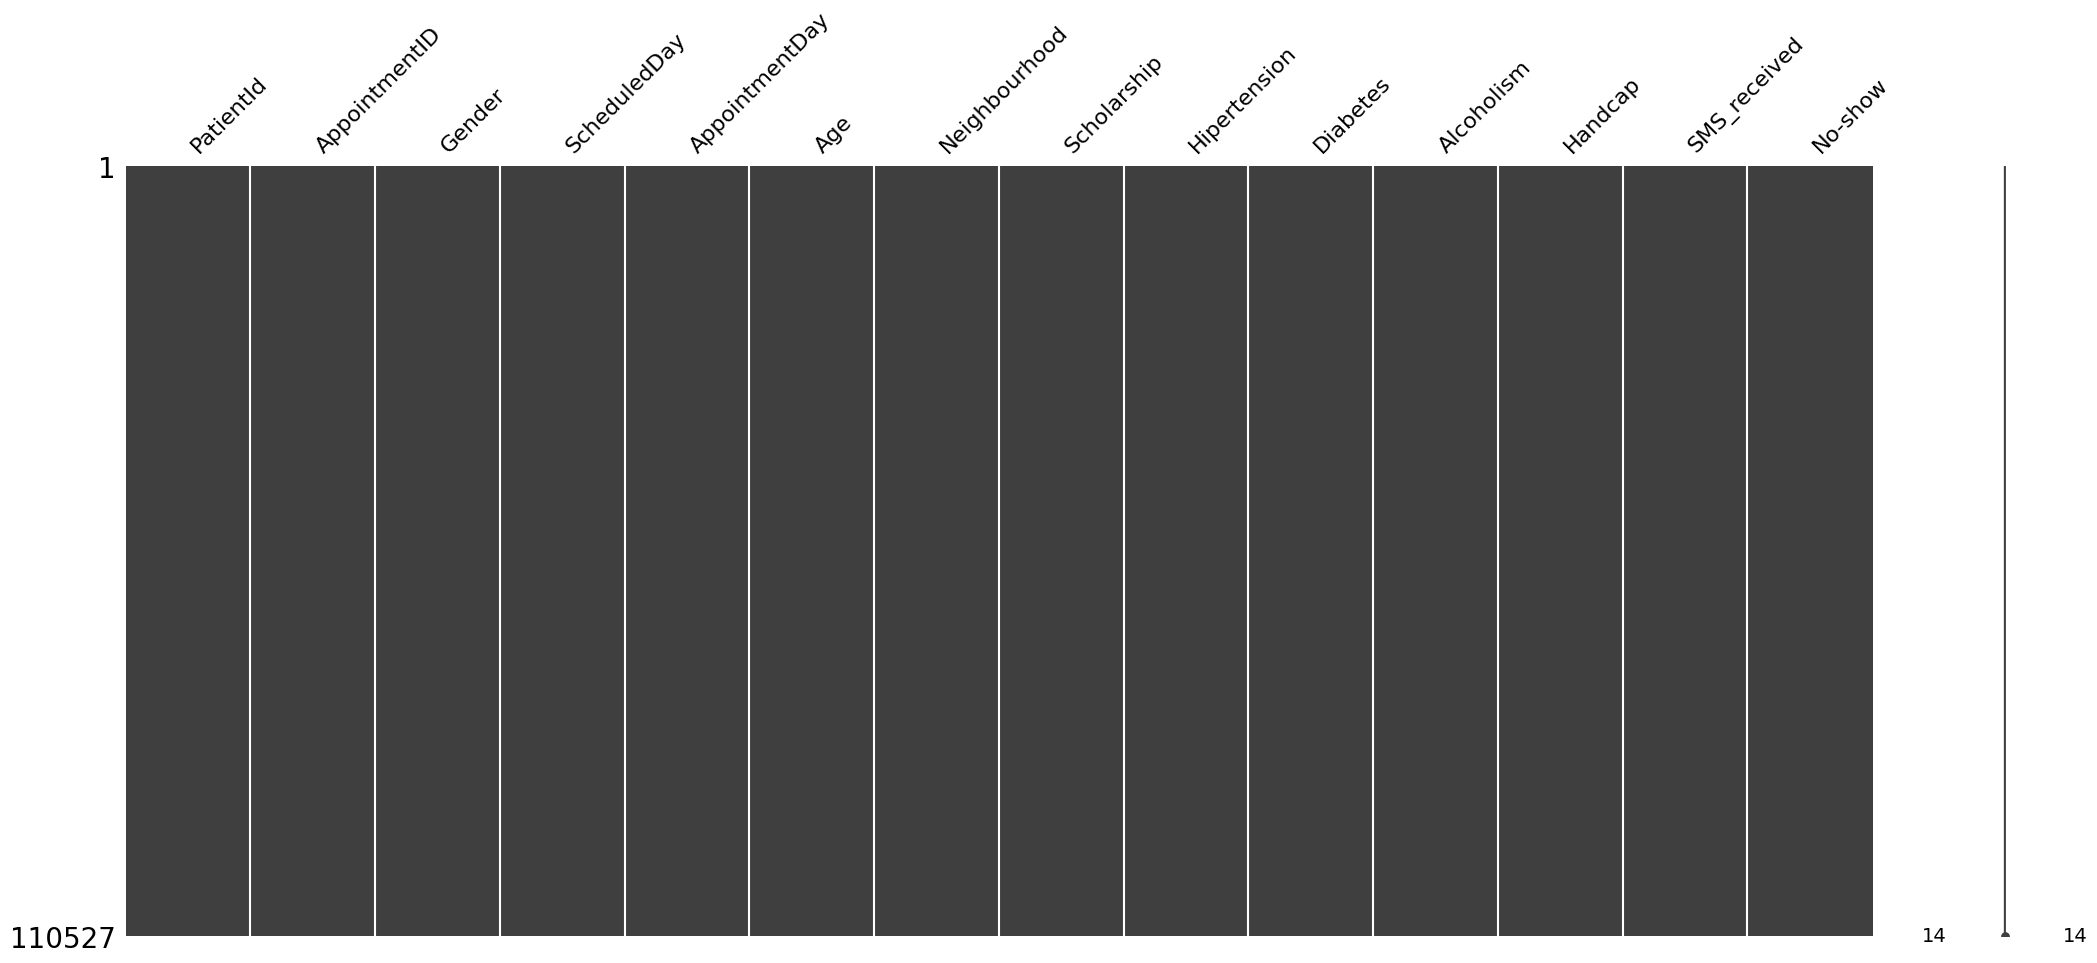

In [42]:
msgn.matrix(data)

data is clean, there is no miss values.

# Encoding features 

### date time features 

In [26]:
data["ScheduledDay"]= pd.to_datetime(data["ScheduledDay"])
data["AppointmentDay"] = pd.to_datetime(data["AppointmentDay"])
data["delta"] = data["AppointmentDay"].sub(data["ScheduledDay"]).dt.days+1

In [29]:
data.drop(data[data["delta"] < 0].index,inplace=True)

In [32]:
waiting_time = pd.crosstab(data["delta"],data['No-show'])
waiting_time = waiting_time[1:]
waiting_time

No-show,0,1
delta,,
1,4100,1113
2,5123,1602
3,2093,644
4,4059,1231
5,2405,872
...,...,...
155,4,6
162,9,2
169,7,1


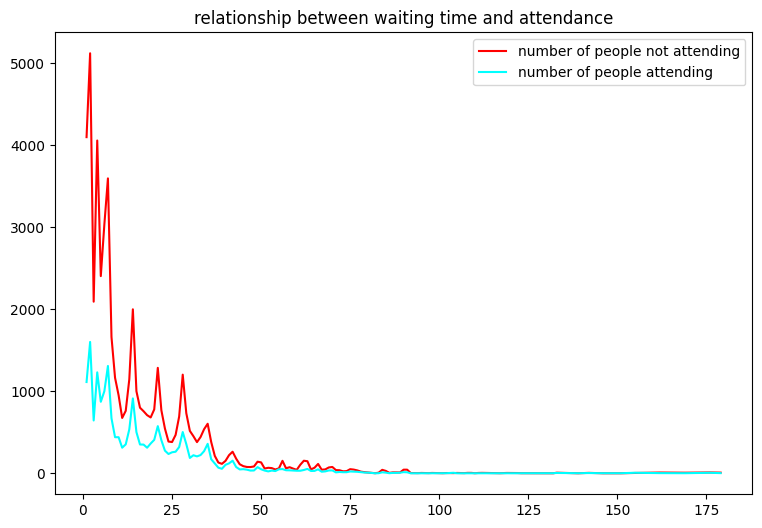

In [39]:
plt.figure(figsize=(9, 6))
xpos = np.arange(len(waiting_time.index))

plt.plot(waiting_time.index,waiting_time.iloc[:,0],label="number of people not attending",color = "red")
plt.plot(waiting_time.index,waiting_time.iloc[:,1],label="number of people attending",color = "cyan")

plt.legend()
plt.title("relationship between waiting time and attendance")

plt.show()

### extracting day of week.

In [40]:
data['scheduled_DOW'] = data['ScheduledDay'].dt.weekday
data['Appointment_DOW'] = data['AppointmentDay'].dt.weekday

### Other features.

In [47]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'delta',
       'scheduled_DOW', 'Appointment_DOW'],
      dtype='object')

In [48]:
# target encoding for neighborhood
mean_target = data.groupby('Neighbourhood')['No-show'].mean()

data['Neighbourhood_tenc'] = data['Neighbourhood'].map(mean_target)

In [51]:
#label encoding for gender
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

### numeric feature transformation and scaling 

In [53]:
data['Age'].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [56]:
data.drop(data[data['Age'] < 0].index,inplace=True)

In [59]:
data['Age']

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110521, dtype: int64

In [67]:
from sklearn.preprocessing import StandardScaler

def apply_standard_scaling(data, columns):

    scaled_data = data.copy()
    scaler = StandardScaler()
    scaled_data[columns] = scaler.fit_transform(scaled_data[columns])
    return scaled_data

In [68]:
data = apply_standard_scaling(data, ['Age', 'delta'])

In [70]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,delta,scheduled_DOW,Appointment_DOW,Neighbourhood_tenc
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,1.077925,JARDIM DA PENHA,0,1,0,0,0,0,0,-0.667603,4,4,0.162755
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0.818295,JARDIM DA PENHA,0,0,0,0,0,0,0,-0.667603,4,4,0.162755
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,1.077925,MATA DA PRAIA,0,0,0,0,0,0,0,-0.667603,4,4,0.170807
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1.258748,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-0.667603,4,4,0.173913
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0.818295,JARDIM DA PENHA,0,1,1,0,0,0,0,-0.667603,4,4,0.162755


In [72]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'delta',
       'scheduled_DOW', 'Appointment_DOW', 'Neighbourhood_tenc'],
      dtype='object')

In [73]:
data.drop(['PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay', 'Neighbourhood'], axis = 1, inplace=True)

# Modeling 

In [74]:
data.columns

Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'delta',
       'scheduled_DOW', 'Appointment_DOW', 'Neighbourhood_tenc'],
      dtype='object')

In [75]:
# train-test split
from sklearn.model_selection import train_test_split

X = data.drop(['No-show'], axis = 1)
y = data['No-show']

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


x_train_tensor = torch.Tensor(np.array(x_train))
y_train_tensor = torch.LongTensor(np.array(y_train))  
x_test_tensor = torch.Tensor(np.array(x_test))
y_test_tensor = torch.LongTensor(np.array(y_test))  
x_val_tensor = torch.Tensor(np.array(x_val))
y_val_tensor = torch.LongTensor(np.array(y_val)) 


# Define the neural network model
class model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(model, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

In [182]:
def validation(model, val_loader):
    

    model.eval()
    total_loss = 0
    num_correct = 0
    num_samples = 0

    loss_fn = nn.BCEWithLogitsLoss()

    for inputs, targets in val_loader:
        
        inputs, targets = inputs, targets

        outputs = model(inputs)
        
        loss = loss_fn(outputs, targets.view(-1, 1).float())
        
        total_loss += loss.item() * inputs.size(0)
        
        num_correct += (outputs.round() == targets).float().mean()
        
        num_samples += inputs.size(0)

    average_loss = total_loss / num_samples

    accuracy = num_correct / num_samples

    return num_correct, average_loss

In [77]:
from tqdm import tqdm

In [85]:
input_size = x_train.shape[1]
hidden_size = 450
output_size = 1
model01 = model(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model01.parameters(), lr=0.0001)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
num_epochs = 50
train_loss = []
val_loss = []
val_accuracy = []

model01.train()

# for epoch in range(num_epochs):
    
#     for inputs, labels in train_loader:
#         outputs = model01(inputs)
#         loss = criterion(outputs, labels.view(-1, 1).float())
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")
#     train_loss.append(loss.item())
#     # val_acc, val_ls = validation(model01, val_loader)
#     # val_accuracy.append(val_acc)
#     # val_loss.append(val_ls)

for epoch in range(num_epochs):
    model01.train()  # Set the model to training mode
    losses = []
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:

        for inputs, labels in train_loader:
            
            outputs = model01(inputs) 
            loss = criterion(outputs, labels.view(-1, 1).float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pbar.set_postfix({'Loss': loss.item()})
            pbar.update(1)
            losses.append(loss.item())
    train_loss.append(np.mean(losses))
    model01.eval()
    val_accuracy.append((model01(x_val_tensor).round() == y_val_tensor).float().mean())

# model01.eval()
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for inputs, labels in test_loader:
#         outputs = model01(inputs)
#         total += labels.size(0)
#         correct += (outputs.round() == labels).float().mean()
#     print(f"Test Accuracy: {correct}")

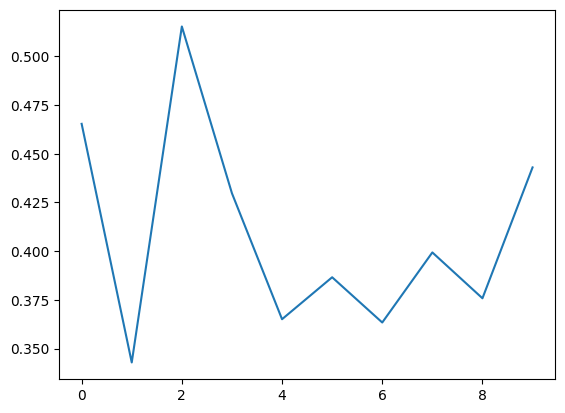

In [80]:
plt.plot(train_loss)

In [81]:
model01.eval()
out = model01(x_val_tensor)
acc = (out.round() == y_val_tensor).float().mean()
print(acc)

tensor(0.7989)


In [82]:
import itertools

y_pred_list = []
model01.eval()

with torch.no_grad():
    for xb_test,yb_test  in test_loader:
        y_test_pred = model01(xb_test)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.detach().numpy())
 
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))

In [83]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


y_true_test = y_test.values.ravel()
conf_matrix = confusion_matrix(y_true_test ,ytest_pred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(conf_matrix)
print("Precision of the MLP :\t"+str(precision_score(y_true_test,ytest_pred)))
print("Recall of the MLP    :\t"+str(recall_score(y_true_test,ytest_pred)))
print("F1 Score of the Model :\t"+str(f1_score(y_true_test,ytest_pred)))

Confusion Matrix of the Test Set
-----------
[[8862   20]
 [2150   21]]
Precision of the MLP :	0.5121951219512195
Recall of the MLP    :	0.009672961768770152
F1 Score of the Model :	0.018987341772151896


In [228]:
model01.eval()
out = model01(x_val_tensor)
acc = (out.round() == y_val_tensor).float().mean()
print(f"Test Accuracy: {acc}")

Test Accuracy: 0.7819748520851135


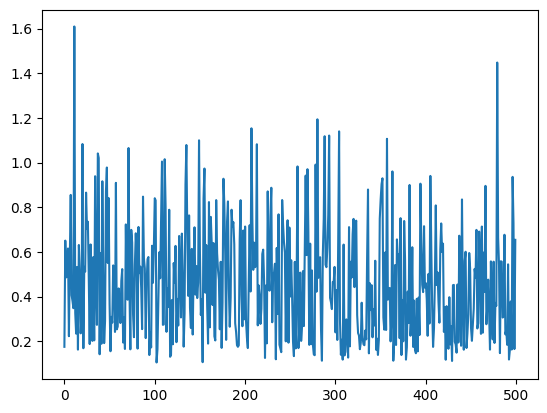

In [229]:
plt.plot(train_loss)

In [147]:
model01.eval()
with torch.no_grad():
    predictions = []
    total = 0
    for inputs, labels in test_loader:
        outputs = model01(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        predictions += predicted
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.7957115715190446


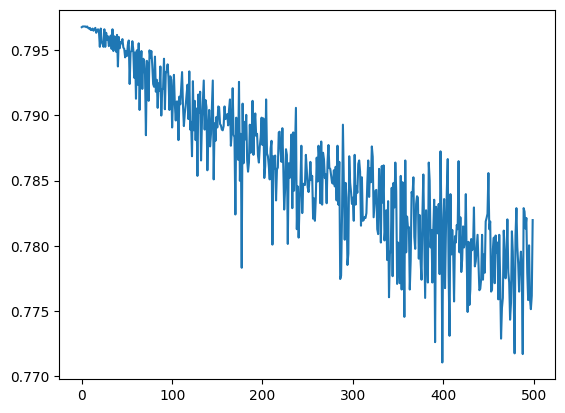

In [230]:
plt.plot(val_accuracy)